# Application for Univariate Time Series: Algorithmic Trading Model for $/₺ Exchange Rates

- <b>Univariate Time Series: ARIMA<b>

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yahoofinancials as yf
import requests
import ftplib
import io

<b>Let's download the Dataset from Yahoo Finance<b>

In [66]:
history = yf.YahooFinancials('USDTRY=X').get_historical_price_data('2017-01-01', '2020-01-01', 'daily')

df = pd.DataFrame(history['USDTRY=X']['prices'])

df = df.drop(['date'], axis=1)
df["formatted_date"] = pd.to_datetime(df['formatted_date'])
df = df.set_index('formatted_date')
df.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2017-01-02,3.54485,3.52440,3.53490,3.53490,0.0,3.53490
2017-01-03,3.60310,3.53529,3.54280,3.54190,0.0,3.54190
2017-01-04,3.59310,3.56700,3.59115,3.59230,0.0,3.59230
2017-01-05,3.63486,3.55536,3.56930,3.56937,0.0,3.56937
2017-01-06,3.63600,3.59137,3.59270,3.59191,0.0,3.59191


<b>We draw the 3-year $/₺ rate from Yahoo Finanace, covering the trading days between 01-01-2017 and 12-31-2020. In the data set, we record the daily opening rate, also called OHLC, intraday high and low exchange rates, and closing rate data as Pandas dataframe. Let's create a new series by taking the differences between the closing rates. This is essentially a one-day trading return. We should pay attention to two things about this variable, which we call "Return", that is, return: 1) Return cannot be calculated for the first trading day in the data set. Because Return is the exchange rate change between the previous day and that trading day. Therefore, it will write Nan (not available - non available) in the Return cell corresponding to the first trading day. 2) We actually obtained the Return variable by applying the difference stationary process to the Close (Close price) series.<b>

<b>Let's create the "return" variable by taking the closing exchange rate difference.<b>

In [67]:
df["returns"] = df["close"].diff()

- <b>Grapp : Closing Price and Return Rate Together<b>

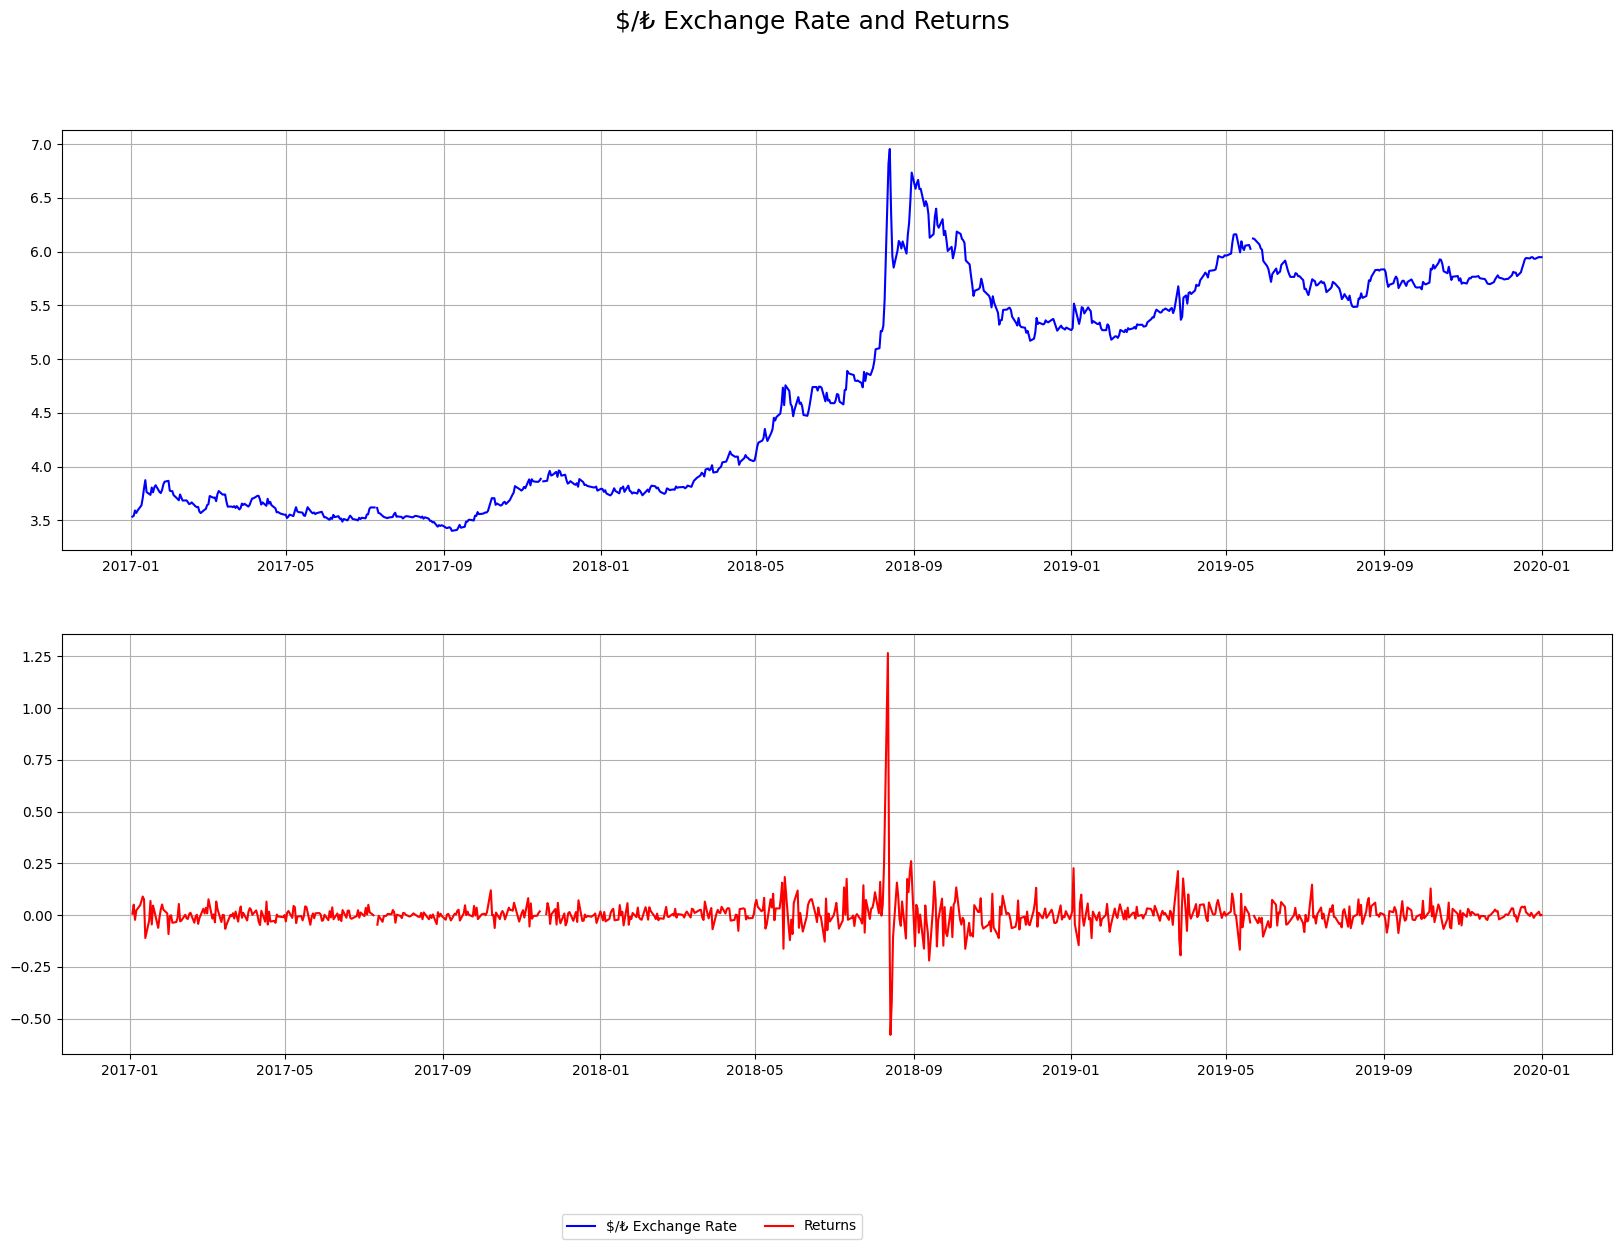

In [68]:
f = plt.figure(figsize=(20,12))
f.suptitle("$/₺ Exchange Rate and Returns", fontsize=18)
plt.subplot(211)
plt.plot(df["close"], color='blue')
plt.grid(True)
plt.subplot(212)
plt.plot(df["returns"], color='red')
f.legend(["$/₺ Exchange Rate", "Returns"], loc='lower center', ncol=2,bbox_to_anchor=(0.45, -0.05))
plt.grid(True)
plt.show()

<b>As can be seen from the graph, while the closing rate is a non-stationary series, it looks like a stationary series by taking the first difference. However, unit root tests should be used to be sure.<b>

<b>Total positive and negative returns over the period.<b>

In [69]:
print("Total positive returns: ", df[df["returns"] > 0].shape[0])
print("Total negative returns: ", df[df["returns"] < 0].shape[0])

Total positive returns:  400
Total negative returns:  375


<b>Basic Stats for Return

In [70]:
df["returns"].describe()

count    776.000000
mean       0.003022
std        0.073055
min       -0.578400
25%       -0.021698
50%        0.000735
75%        0.024542
max        1.265800
Name: returns, dtype: float64